# Image Identification - Shark Species

# Data Wrangling

In [9]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [11]:
os.getcwd()

'/Users/alexschoenberg/Documents/Springboard/Sharks capstone'

Total images of sharks: 1544

Training set: 1166 images
Test set: 378 images

Approximately 25% - 75% split, with roughly 25-30 testing images and 85-100 training images of each shark species.

In [23]:
#preparing and processing training data

train_images = []
train_labels = []
shape_tr = (516, 516)
train_path = '/Users/alexschoenberg/Documents/Springboard/Sharks capstone/sharks/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img_tr = cv2.imread(os.path.join(train_path, filename))
        train_labels.append(filename.split('_')[0]) #filename convention is (sharkname)_(imgnumber).jpg/jpeg
        img_tr = cv2.resize(img_tr, shape_tr) #resize all images to uniform shape
        train_images.append(img_tr)
        
#one hot encoding of labels
train_labels = pd.get_dummies(train_labels).values

#converting images list to numpy array
train_images = np.array(train_images)

#splitting training images array into training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=42)

In [34]:
#preparing and processing testing data

test_images = []
test_labels = []
shape_te = (516, 516)
test_path = '/Users/alexschoenberg/Documents/Springboard/Sharks capstone/sharks/test'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        try:
            img_te = cv2.imread(os.path.join(test_path, filename))
            test_labels.append(filename.split('_')[0]) #filename convention is (sharkname)_(imgnumber).jpg/jpeg
            img_te = cv2.resize(img_te, shape_te) #resize all images to uniform shape
            test_images.append(img_te)
        except Exception as e:
            print(str(e))
        
#one hot encoding of labels - commented out in this case because this is the test set, but test data labels are
#stored in the test_labels list after being organized in the same manner as the training data labels
#test_labels = pd.get_dummies(test_labels).values

#converting images list to numpy array
test_images = np.array(test_images)

OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [47]:
train_images.shape

(1114, 516, 516, 3)

In [50]:
print(X_train.shape)
print(X_val.shape)

(835, 516, 516, 3)
(279, 516, 516, 3)


Out of the original 1166 training images, 1114 images were processed into our final training dataset, which was the split for training and validation. Some images in the original dataset could have been the wrong file type (such as a png) or otherwise not acceptable for processing.

In [48]:
test_images.shape

(360, 516, 516, 3)

Out of the original 378 testing images, 360 images were processed into our final testing dataset. As in the training data, some images could have been of the wrong file type or otherwise unacceptable and were left out in the exception rule.

[0 0 0 0 0 0 0 0 0 0 0 0 0 1]


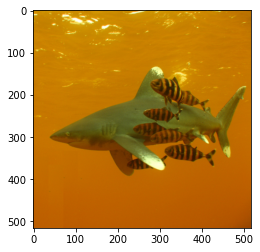

In [35]:
#visualize training data
print(train_labels[10])
plt.imshow(train_images[10])

This is good! This is an image of a whitetip shark and it's labeled correctly with one-hot encoding.

[0 0 0 0 0 0 0 0 0 0 1 0 0 0]


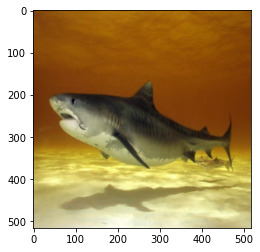

In [36]:
#another check
print(train_labels[500])
plt.imshow(train_images[500])

A tiger shark, also labeled correctly.

tiger


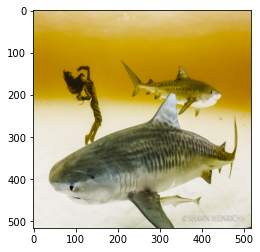

In [45]:
#check testing data in similar way - labels have not been one-hot encoded but they are appended to a list
print(test_labels[50])
plt.imshow(test_images[50])

This tiger shark is labeled correctly in the testing set.

basking


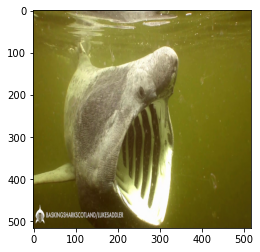

In [46]:
#one more testing set check
print(test_labels[100])
plt.imshow(test_images[100])

A very recognizable basking shark.